In [93]:
# importing requried libaraies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data
obesity = pd.read_csv("C:/Users/Dell/Documents/Data_Sets/Dataset/ObesityDataSet_raw_and_data_sinthetic.csv")
obesity.head(10)

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   
5    Male  29.0    1.62    53.0                             no  yes   2.0   
6  Female  23.0    1.50    55.0                            yes  yes   3.0   
7    Male  22.0    1.64    53.0                             no   no   2.0   
8    Male  24.0    1.78    64.0                            yes  yes   3.0   
9    Male  22.0    1.72    68.0                            yes  yes   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
5  3.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   
6  3.0  Sometimes    no   2.0   no  1.0  0.0   Sometimes   
7  3.0  Sometimes    no   2.0   no  3.0  0.0   Sometimes   
8  3.0  Sometimes    no   2.0   no  1.0  1.0  Frequently   
9  3.0  Sometimes    no   2.0   no  1.0  1.0          no   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II  
5             Automobile        Normal_Weight  
6              Motorbike        Normal_Weight  
7  Public_Transportation        Normal_Weight  
8  Public_Transportation        Normal_Weight  
9  Public_Transportation        Normal_Weight

In [3]:
# checking shape
obesity.shape

(2111, 17)

In [4]:
# features information
# 1.Gender
#2. Age
#3. Height
#4. Weight
#5. family_history_with_overweight
#6.FAVC (Frecuent consumption of high caloric foods)
#7.FCVC (Frequency of consumption of vegetables)
#8. NCP (Number of main meals)
#9. CAEC (Consumption of food between meals)
#10.SMOKE (Smoking habit)
#11.CH2O (Consumption of water daily)
#12.SCC (Calories consumption monitoring)
#13. FAF (Physical activity frequency)
#14. TUE (Time using technology devices)
#15.CALC (Consumption of alcohol)
#16. MTRANS (Transportation used)
#17.NObeyesdad (Number of Obesity Diseases)

In [5]:
# checking information
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [97]:
# rounding height column to after decimal to digit
obesity['Height'] = obesity['Height'].round(2)
obesity['Height'].head()

0    1.62
1    1.52
2    1.80
3    1.80
4    1.78
Name: Height, dtype: float64

In [7]:
obesity.select_dtypes(exclude ="object").columns
num = ['Age', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [8]:
# changing datatype float to int64
for i in num:
    obesity[i] =obesity[i].astype("int64")

In [9]:
# after changing datatype checking datatypes
obesity.dtypes

Gender                             object
Age                                 int64
Height                            float64
Weight                              int64
family_history_with_overweight     object
FAVC                               object
FCVC                                int64
NCP                                 int64
CAEC                               object
SMOKE                              object
CH2O                                int64
SCC                                object
FAF                                 int64
TUE                                 int64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [10]:
# checking duplicates
obesity.duplicated().sum()

284

In [11]:
#droping duplicates
obesity = obesity.drop_duplicates()

## Exploratory data analysis
### Univarant analysis on Numerical columns


In [12]:
num = obesity.select_dtypes(exclude = "object")

In [13]:
for i in num:
    fig = px.box(obesity,x =i)
    fig.show()

### Univarant analysis on Categorical columns

In [14]:
cat =obesity.select_dtypes(include = 'object').columns
cat

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [15]:
for i in cat:
    fig =px.bar(obesity,x =i)
    fig.show()

## Bivarant Analysis
### Numerical column vs Numerical column

In [16]:
obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [17]:
obesity.select_dtypes(exclude = "object")

Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE
0      21    1.62      64     2    3     2    0    1
1      21    1.52      56     3    3     3    3    0
2      23    1.80      77     2    3     2    2    1
3      27    1.80      87     3    3     2    2    0
4      22    1.78      89     2    1     2    0    0
...   ...     ...     ...   ...  ...   ...  ...  ...
2097   25    1.63     105     3    3     2    0    0
2100   25    1.63     107     3    3     2    0    0
2102   25    1.63     108     3    3     2    0    0
2104   21    1.73     133     3    3     1    1    0
2108   22    1.75     133     3    3     2    1    0

[1827 rows x 8 columns]

<Axes: xlabel='Age', ylabel='Height'>

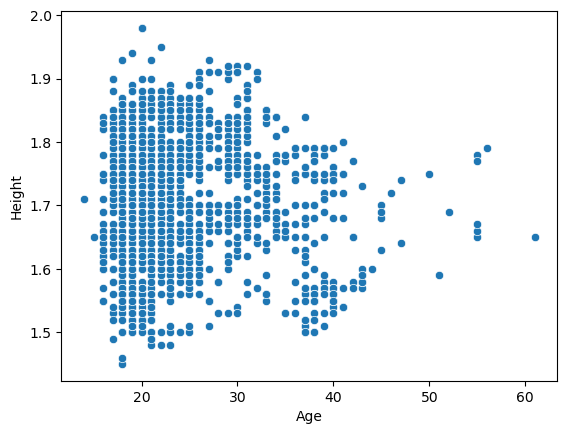

In [18]:
sns.scatterplot(x=obesity['Age'],y=obesity['Height'])

<Axes: xlabel='Age', ylabel='Weight'>

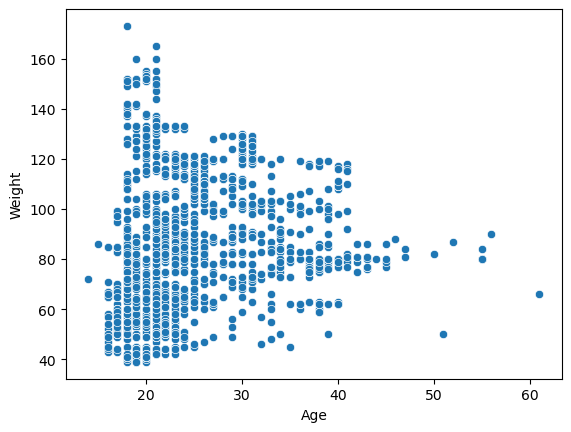

In [19]:
sns.scatterplot(x=obesity['Age'],y=obesity['Weight'])

<Axes: xlabel='Age', ylabel='FCVC'>

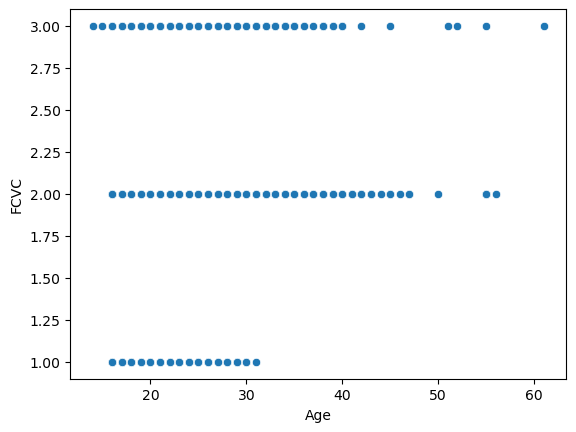

In [20]:
sns.scatterplot(x=obesity['Age'],y=obesity['FCVC'])

<Axes: xlabel='Age', ylabel='NCP'>

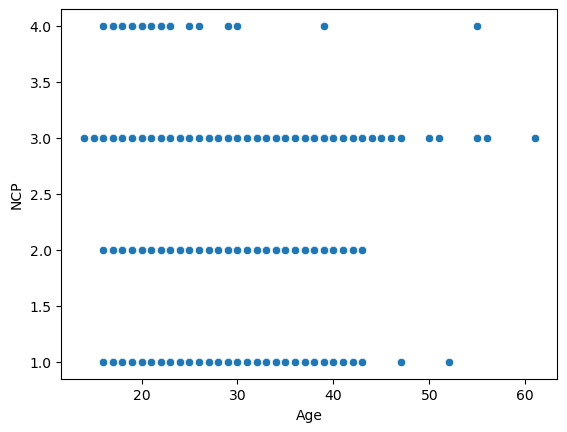

In [21]:
sns.scatterplot(x=obesity['Age'],y=obesity['NCP'])

<Axes: xlabel='Age', ylabel='CH2O'>

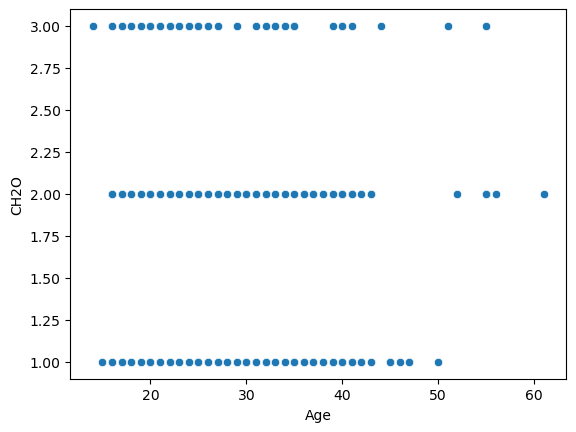

In [22]:
sns.scatterplot(x=obesity['Age'],y=obesity['CH2O'])

<Axes: xlabel='Age', ylabel='FAF'>

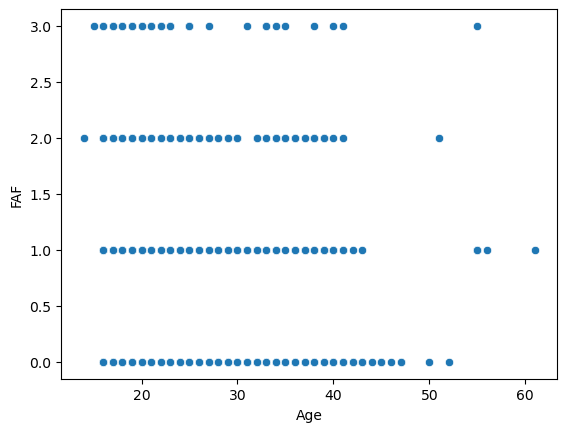

In [23]:
sns.scatterplot(x=obesity['Age'],y=obesity['FAF'])

<Axes: xlabel='Age', ylabel='TUE'>

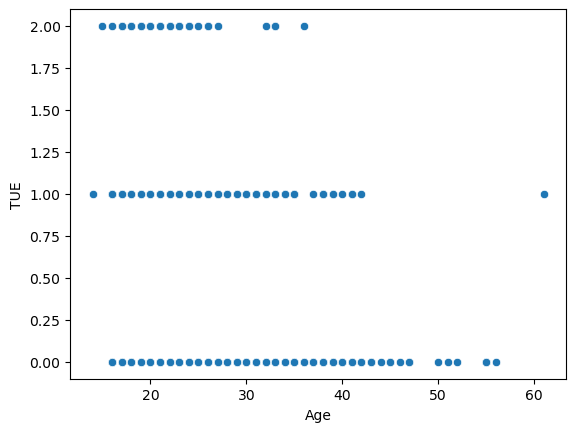

In [24]:
sns.scatterplot(x=obesity['Age'],y=obesity['TUE'])

## Categorical vs Numerical columns

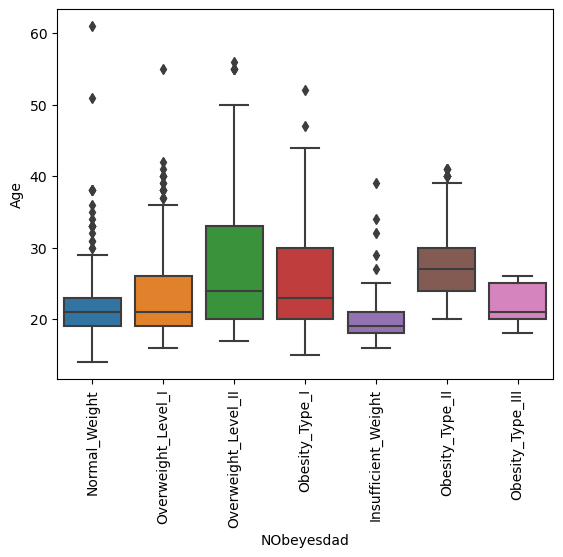

In [25]:
sns.boxplot(x =obesity['NObeyesdad'],y = obesity['Age'])
plt.xticks(rotation =90)
plt.show()

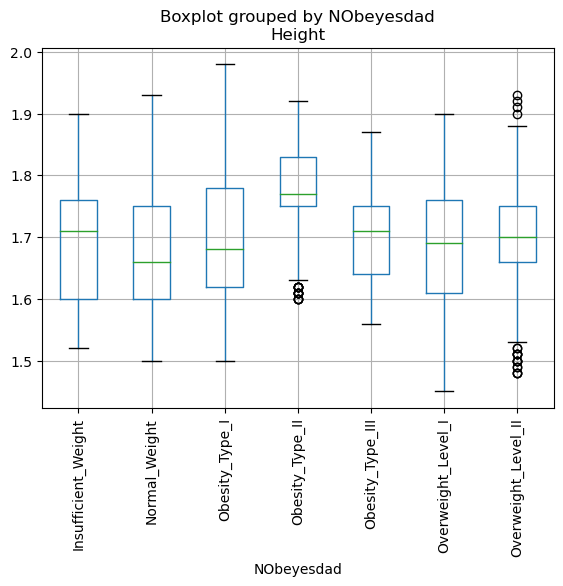

In [26]:
obesity.boxplot(by ="NObeyesdad",column ="Height")
plt.xticks(rotation =90)
plt.show()

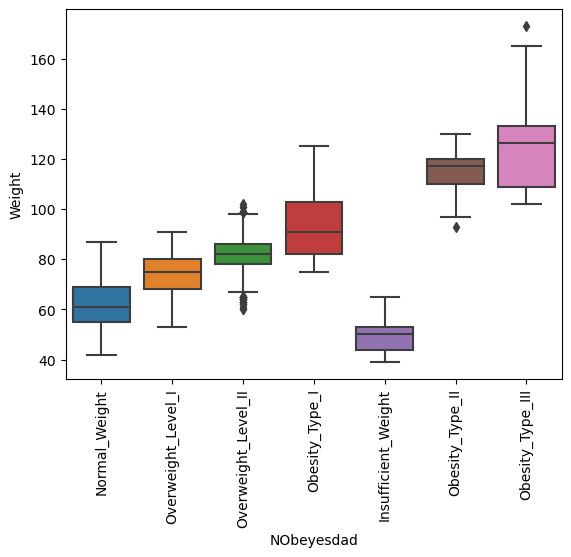

In [27]:
sns.boxplot(x =obesity['NObeyesdad'],y = obesity['Weight'])
plt.xticks(rotation =90)
plt.show()

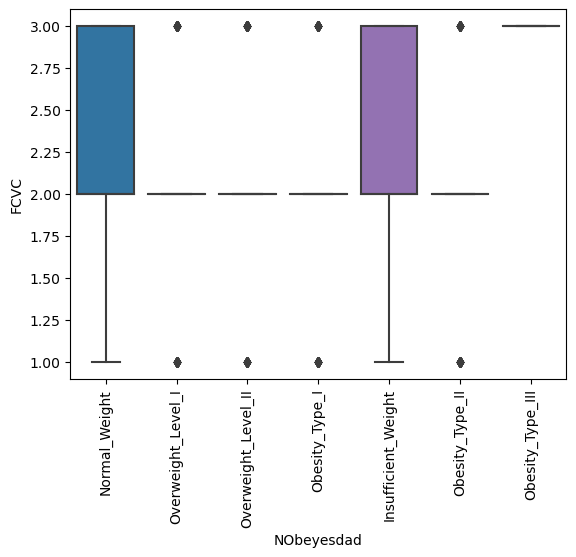

In [28]:
sns.boxplot(x =obesity['NObeyesdad'],y = obesity['FCVC'])
plt.xticks(rotation =90)
plt.show()

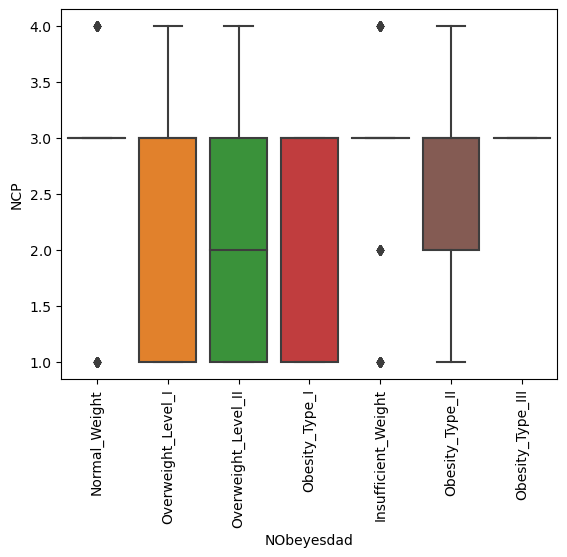

In [29]:
sns.boxplot(x =obesity['NObeyesdad'],y = obesity['NCP'])
plt.xticks(rotation =90)
plt.show()

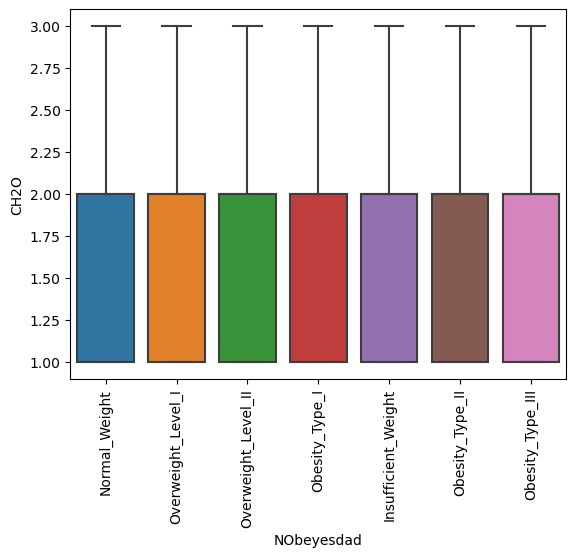

In [30]:
sns.boxplot(x =obesity['NObeyesdad'],y = obesity['CH2O'])
plt.xticks(rotation =90)
plt.show()

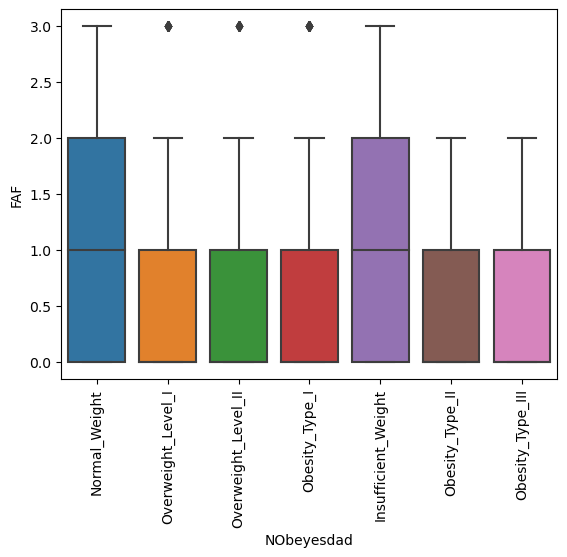

In [31]:
sns.boxplot(x =obesity['NObeyesdad'],y = obesity['FAF'])
plt.xticks(rotation =90)
plt.show()

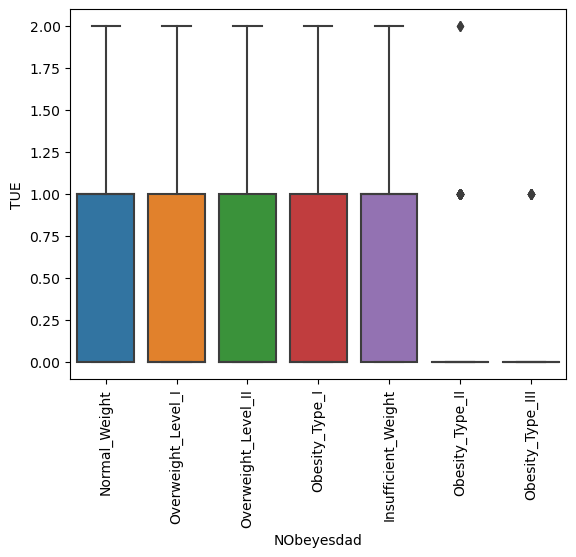

In [32]:
sns.boxplot(x =obesity['NObeyesdad'],y = obesity['TUE'])
plt.xticks(rotation =90)
plt.show()

## Categorical column vs Categorical column

In [33]:
obesity.select_dtypes(include ="object").columns
bivarant_cat =['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS']
bivarant_cat

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

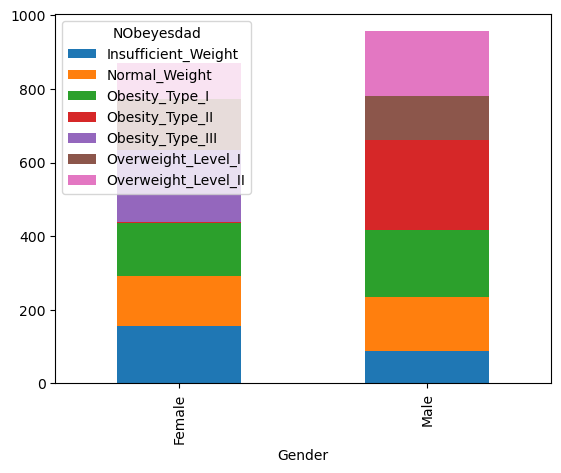

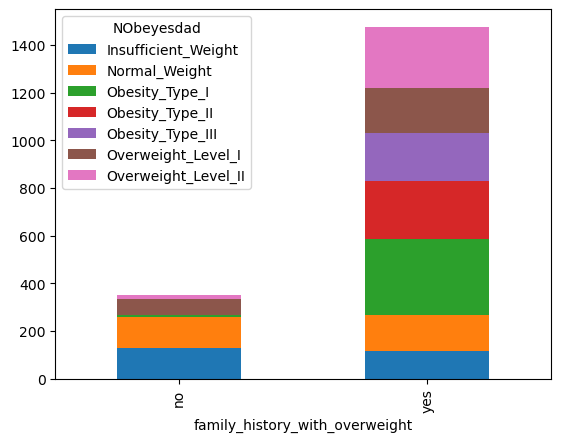

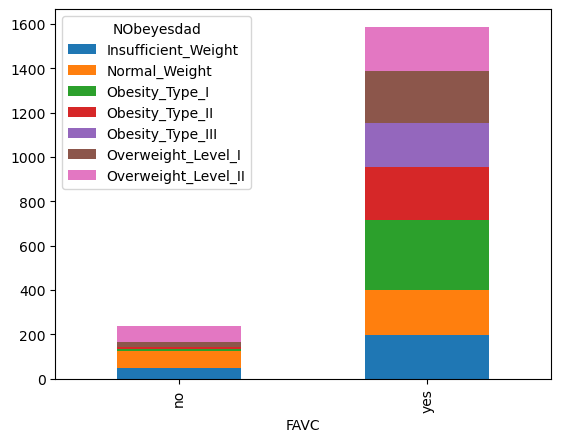

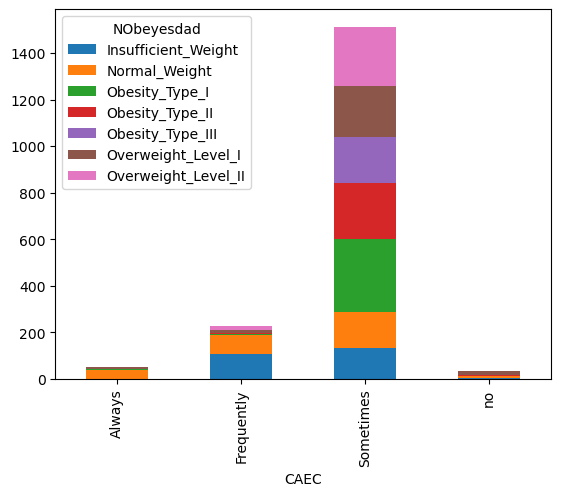

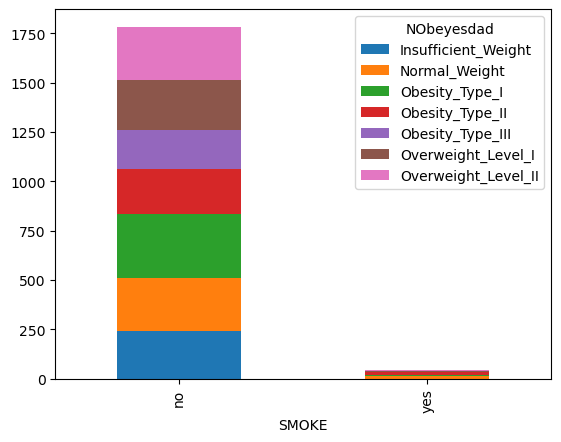

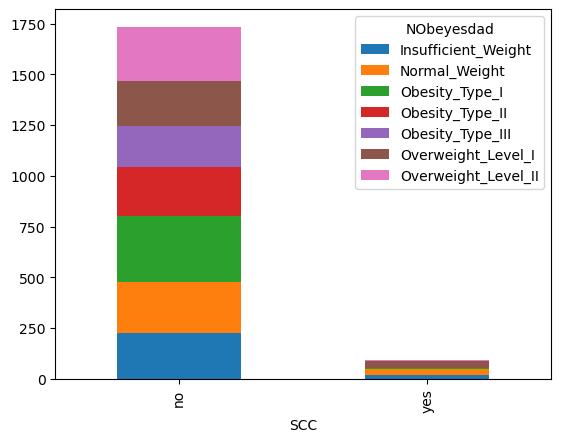

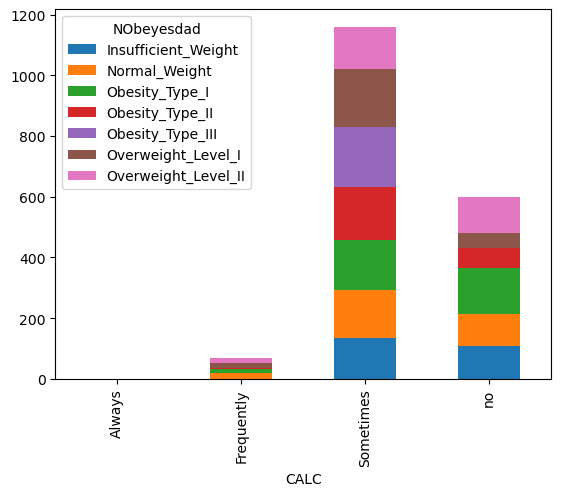

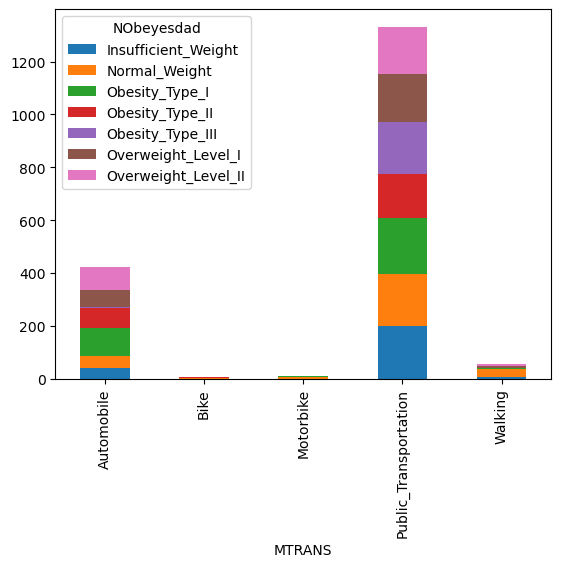

In [34]:
for i in bivarant_cat:
    j= pd.crosstab(obesity[i],obesity['NObeyesdad'])
    j.plot(kind = 'bar',stacked =True)

## Multi_Varant Analysis

<Axes: >

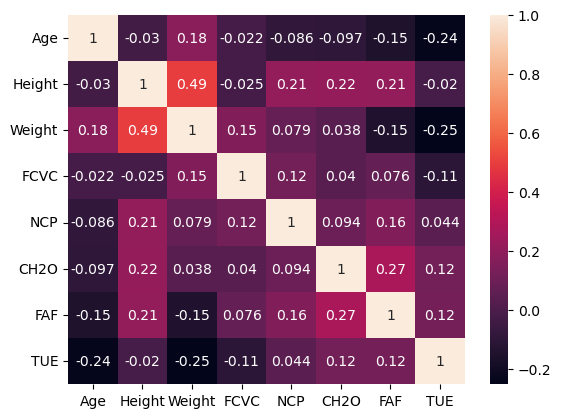

In [94]:
sns.heatmap(obesity.corr(),annot=True)

## Building Machine_learning Model

In [36]:
obesity.head()

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62      64                            yes   no     2    3   
1  Female   21    1.52      56                            yes   no     3    3   
2    Male   23    1.80      77                            yes   no     2    3   
3    Male   27    1.80      87                             no   no     3    3   
4    Male   22    1.78      89                             no   no     2    1   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no     2   no    0    1          no  Public_Transportation   
1  Sometimes   yes     3  yes    3    0   Sometimes  Public_Transportation   
2  Sometimes    no     2   no    2    1  Frequently  Public_Transportation   
3  Sometimes    no     2   no    2    0  Frequently                Walking   
4  Sometimes    no     2   no    0    0   Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Level_I  
4  Overweight_Level_II

In [37]:
obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

## Identifying input variable and Target variable

In [38]:

X = obesity[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS']]
y = obesity[['NObeyesdad']]

## spliting data into train and test

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.20,random_state=40)

In [42]:
print(X_train.shape)
print(X_test.shape)

(1461, 16)
(366, 16)


## sepearating numerical and categorical columns

In [43]:
X_train_num = X_train.select_dtypes(exclude = "object")
X_train_num.head()

Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE
271    19    1.50      50     2    3     1    0    2
1634   30    1.86     123     2    3     2    1    0
1458   18    1.69      92     2    3     1    1    0
955    34    1.68      73     3    2     1    0    0
386    18    1.59      53     1    3     1    1    2

In [44]:
X_train_cat = X_train.select_dtypes(include ="object")
X_train_cat.head()

Gender family_history_with_overweight FAVC        CAEC SMOKE SCC  \
271   Female                             no  yes  Frequently    no  no   
1634    Male                            yes  yes   Sometimes    no  no   
1458  Female                            yes  yes   Sometimes    no  no   
955   Female                            yes  yes   Sometimes    no  no   
386   Female                             no   no   Sometimes    no  no   

           CALC                 MTRANS  
271   Sometimes  Public_Transportation  
1634  Sometimes             Automobile  
1458  Sometimes  Public_Transportation  
955   Sometimes             Automobile  
386          no  Public_Transportation

## Data Preparation on X train

## rescaling the numerical column

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_rescale =pd.DataFrame(scaler.fit_transform(X_train_num),
                                 columns=X_train_num.columns,
                                 index = X_train_num.index)
X_train_num_rescale.head()

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
271  -0.751754 -2.145365 -1.330272 -0.318756  0.579959 -1.157087 -0.903117   
1634  0.902331  1.656442  1.492094 -0.318756  0.579959  0.500270  0.263509   
1458 -0.902125 -0.138856  0.293555 -0.318756  0.579959 -1.157087  0.263509   
955   1.503817 -0.244462 -0.441034  1.399706 -0.615133 -1.157087 -0.903117   
386  -0.902125 -1.194913 -1.214285 -2.037219  0.579959 -1.157087  0.263509   

           TUE  
271   2.650080  
1634 -0.689089  
1458 -0.689089  
955  -0.689089  
386   2.650080

## Applying One Hot Encoding on Categorical column 

In [46]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop="first",sparse_output = False,handle_unknown='ignore')
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat),
                              columns = encoder.get_feature_names_out(X_train_cat.columns),
                              index = X_train_cat.index)
X_train_cat_ohe.head()

Gender_Male  family_history_with_overweight_yes  FAVC_yes  \
271           0.0                                 0.0       1.0   
1634          1.0                                 1.0       1.0   
1458          0.0                                 1.0       1.0   
955           0.0                                 1.0       1.0   
386           0.0                                 0.0       0.0   

      CAEC_Frequently  CAEC_Sometimes  CAEC_no  SMOKE_yes  SCC_yes  \
271               1.0             0.0      0.0        0.0      0.0   
1634              0.0             1.0      0.0        0.0      0.0   
1458              0.0             1.0      0.0        0.0      0.0   
955               0.0             1.0      0.0        0.0      0.0   
386               0.0             1.0      0.0        0.0      0.0   

      CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
271              1.0      0.0          0.0               0.0   
1634             1.0      0.0          0.0               0.0   
1458             1.0      0.0          0.0               0.0   
955              1.0      0.0          0.0               0.0   
386              0.0      1.0          0.0               0.0   

      MTRANS_Public_Transportation  MTRANS_Walking  
271                            1.0             0.0  
1634                           0.0             0.0  
1458                           1.0             0.0  
955                            0.0             0.0  
386                            1.0             0.0

## concat numerical and Categorical of X_train data

In [47]:
X_train_transformed = pd.concat([X_train_num_rescale,X_train_cat_ohe],axis=1)
X_train_transformed.head()

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
271  -0.751754 -2.145365 -1.330272 -0.318756  0.579959 -1.157087 -0.903117   
1634  0.902331  1.656442  1.492094 -0.318756  0.579959  0.500270  0.263509   
1458 -0.902125 -0.138856  0.293555 -0.318756  0.579959 -1.157087  0.263509   
955   1.503817 -0.244462 -0.441034  1.399706 -0.615133 -1.157087 -0.903117   
386  -0.902125 -1.194913 -1.214285 -2.037219  0.579959 -1.157087  0.263509   

           TUE  Gender_Male  family_history_with_overweight_yes  ...  \
271   2.650080          0.0                                 0.0  ...   
1634 -0.689089          1.0                                 1.0  ...   
1458 -0.689089          0.0                                 1.0  ...   
955  -0.689089          0.0                                 1.0  ...   
386   2.650080          0.0                                 0.0  ...   

      CAEC_Sometimes  CAEC_no  SMOKE_yes  SCC_yes  CALC_Sometimes  CALC_no  \
271              0.0      0.0        0.0      0.0             1.0      0.0   
1634             1.0      0.0        0.0      0.0             1.0      0.0   
1458             1.0      0.0        0.0      0.0             1.0      0.0   
955              1.0      0.0        0.0      0.0             1.0      0.0   
386              1.0      0.0        0.0      0.0             0.0      1.0   

      MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
271           0.0               0.0                           1.0   
1634          0.0               0.0                           0.0   
1458          0.0               0.0                           1.0   
955           0.0               0.0                           0.0   
386           0.0               0.0                           1.0   

      MTRANS_Walking  
271              0.0  
1634             0.0  
1458             0.0  
955              0.0  
386              0.0  

[5 rows x 22 columns]

In [48]:
X_test.head()

Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
1283  Female   30    1.53      78                            yes  yes     2   
1575    Male   29    1.78     112                            yes  yes     2   
673   Female   18    1.53      41                             no  yes     2   
702     Male   19    1.76      55                            yes  yes     2   
1094  Female   25    1.50      64                            yes   no     2   

      NCP       CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
1283    1  Sometimes    no     1  no    0    0         no   
1575    3  Sometimes    no     2  no    0    0  Sometimes   
673     1  Sometimes    no     1  no    0    1  Sometimes   
702     4  Sometimes    no     2  no    2    1         no   
1094    1  Sometimes    no     1  no    0    0         no   

                     MTRANS  
1283  Public_Transportation  
1575             Automobile  
673   Public_Transportation  
702              Automobile  
1094  Public_Transportation

In [49]:
# separating numerical column
X_test_num = X_test.select_dtypes(exclude ="object")
X_test_num.head()

Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE
1283   30    1.53      78     2    1     1    0    0
1575   29    1.78     112     2    3     2    0    0
673    18    1.53      41     2    1     1    0    1
702    19    1.76      55     2    4     2    2    1
1094   25    1.50      64     2    1     1    0    0

In [50]:
# separating categorical column
X_test_cat = X_test.select_dtypes(include ="object")
X_test_cat.head()

Gender family_history_with_overweight FAVC       CAEC SMOKE SCC  \
1283  Female                            yes  yes  Sometimes    no  no   
1575    Male                            yes  yes  Sometimes    no  no   
673   Female                             no  yes  Sometimes    no  no   
702     Male                            yes  yes  Sometimes    no  no   
1094  Female                            yes   no  Sometimes    no  no   

           CALC                 MTRANS  
1283         no  Public_Transportation  
1575  Sometimes             Automobile  
673   Sometimes  Public_Transportation  
702          no             Automobile  
1094         no  Public_Transportation

## Data preparation on X_test

## rescaling numerical columns

In [51]:
X_test_num_rescale = pd.DataFrame(scaler.transform(X_test_num),
                                 columns= X_test_num.columns,
                                 index = X_test_num.index)
X_test_num_rescale.head()

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
1283  0.902331 -1.828548 -0.247721 -0.318756 -1.810225 -1.157087 -0.903117   
1575  0.751960  0.811596  1.066806 -0.318756  0.579959  0.500270 -0.903117   
673  -0.902125 -1.828548 -1.678235 -0.318756 -1.810225 -1.157087 -0.903117   
702  -0.751754  0.600384 -1.136960 -0.318756  1.775051  0.500270  1.430135   
1094  0.150474 -2.145365 -0.788997 -0.318756 -1.810225 -1.157087 -0.903117   

           TUE  
1283 -0.689089  
1575 -0.689089  
673   0.980495  
702   0.980495  
1094 -0.689089

## applying onehotencoding on categorical columns

In [95]:
X_test_cat_ohe =pd.DataFrame(encoder.transform(X_test_cat),
                            columns =encoder.get_feature_names_out(X_test_cat.columns),
                            index = X_test_cat.index)
X_test_cat_ohe.head()

Gender_Male  family_history_with_overweight_yes  FAVC_yes  \
1283          0.0                                 1.0       1.0   
1575          1.0                                 1.0       1.0   
673           0.0                                 0.0       1.0   
702           1.0                                 1.0       1.0   
1094          0.0                                 1.0       0.0   

      CAEC_Frequently  CAEC_Sometimes  CAEC_no  SMOKE_yes  SCC_yes  \
1283              0.0             1.0      0.0        0.0      0.0   
1575              0.0             1.0      0.0        0.0      0.0   
673               0.0             1.0      0.0        0.0      0.0   
702               0.0             1.0      0.0        0.0      0.0   
1094              0.0             1.0      0.0        0.0      0.0   

      CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
1283             0.0      1.0          0.0               0.0   
1575             1.0      0.0          0.0               0.0   
673              1.0      0.0          0.0               0.0   
702              0.0      1.0          0.0               0.0   
1094             0.0      1.0          0.0               0.0   

      MTRANS_Public_Transportation  MTRANS_Walking  
1283                           1.0             0.0  
1575                           0.0             0.0  
673                            1.0             0.0  
702                            0.0             0.0  
1094                           1.0             0.0

## concat numerical and Categorical of X_test data

In [53]:
X_test_transformed = pd.concat([X_test_num_rescale,X_test_cat_ohe],axis=1)
X_test_transformed.head()

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
1283  0.902331 -1.828548 -0.247721 -0.318756 -1.810225 -1.157087 -0.903117   
1575  0.751960  0.811596  1.066806 -0.318756  0.579959  0.500270 -0.903117   
673  -0.902125 -1.828548 -1.678235 -0.318756 -1.810225 -1.157087 -0.903117   
702  -0.751754  0.600384 -1.136960 -0.318756  1.775051  0.500270  1.430135   
1094  0.150474 -2.145365 -0.788997 -0.318756 -1.810225 -1.157087 -0.903117   

           TUE  Gender_Male  family_history_with_overweight_yes  ...  \
1283 -0.689089          0.0                                 1.0  ...   
1575 -0.689089          1.0                                 1.0  ...   
673   0.980495          0.0                                 0.0  ...   
702   0.980495          1.0                                 1.0  ...   
1094 -0.689089          0.0                                 1.0  ...   

      CAEC_Sometimes  CAEC_no  SMOKE_yes  SCC_yes  CALC_Sometimes  CALC_no  \
1283             1.0      0.0        0.0      0.0             0.0      1.0   
1575             1.0      0.0        0.0      0.0             1.0      0.0   
673              1.0      0.0        0.0      0.0             1.0      0.0   
702              1.0      0.0        0.0      0.0             0.0      1.0   
1094             1.0      0.0        0.0      0.0             0.0      1.0   

      MTRANS_Bike  MTRANS_Motorbike  MTRANS_Public_Transportation  \
1283          0.0               0.0                           1.0   
1575          0.0               0.0                           0.0   
673           0.0               0.0                           1.0   
702           0.0               0.0                           0.0   
1094          0.0               0.0                           1.0   

      MTRANS_Walking  
1283             0.0  
1575             0.0  
673              0.0  
702              0.0  
1094             0.0  

[5 rows x 22 columns]

## KNN_Classifier

In [54]:
## Training model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier .fit(X_train_transformed,y_train)

KNeighborsClassifier()

In [55]:
## predction of model
y_test_pred = classifier.predict(X_test_transformed)

In [56]:
## Evalutionof model
from sklearn import metrics
knn= metrics.accuracy_score(y_test, y_test_pred)
knn

0.7650273224043715

## DecisionTreeClassifier

In [57]:
## Training model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier .fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [58]:
## predction of model
y_test_pred = classifier.predict(X_test_transformed)

In [59]:
## Evalutionof model
Decision_Tree =metrics.accuracy_score(y_test, y_test_pred)
Decision_Tree

0.9398907103825137

## RandomForestClassifier

In [60]:
## Training model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier .fit(X_train_transformed,y_train)

RandomForestClassifier()

In [61]:
## predction of model
y_test_pred = classifier.predict(X_test_transformed)

In [62]:
## Evalutionof model
Random_Forest =metrics.accuracy_score(y_test, y_test_pred)
Random_Forest

0.9316939890710383

## LogisticRegression

In [96]:
## Training model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier .fit(X_train_transformed,y_train)

LogisticRegression()

In [64]:
## predction of model
y_test_pred = classifier.predict(X_test_transformed)

In [65]:
## Evalutionof model
Logistic_Regression =metrics.accuracy_score(y_test, y_test_pred)
Logistic_Regression

0.860655737704918

In [64]:
## Conclusion about algorithm
## The best algorithm to predcit obesity is Decision tree is first prefence and second prefence is RandomForest.

In [88]:
Algorithm_data= pd.DataFrame({ "Algorithm_name" :[ 'K_Nearest_Neighbors','Decision_tree',
                                                  'Logistic_regression','Random_forest'],
                  "Algorithm_accuracy_score":[knn*100,Decision_Tree*100,Logistic_Regression*100,Random_Forest*100]
    
})

In [89]:
Algorithm_data

Algorithm_name  Algorithm_accuracy_score
0  K_Nearest_Neighbors                 76.502732
1        Decision_tree                 93.989071
2  Logistic_regression                 86.065574
3        Random_forest                 93.169399

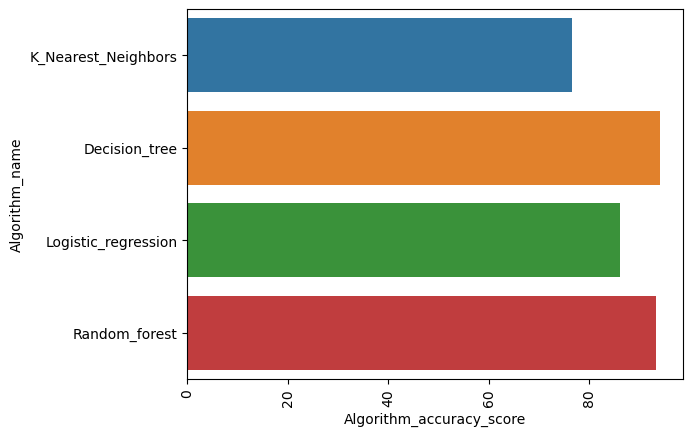

In [90]:
sns.barplot(Algorithm_data, y= "Algorithm_name",x = 'Algorithm_accuracy_score',orient='horizontal')
plt.xticks(rotation =90)
plt.show()